## Human Activity Recognition (HAR) modeling using mobile phone built in sensors

30 volunteers. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone. Sensor measurments captured at a constant rate of 50Hz & pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).

Data set randomly partitioned by person into two sets: 

70% :training data- I plan to split further into train and test/validation for model learning. 

30% :test data- I plan for this set to be treated as unseen data

Data courtesy of UCI:https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

## Importing libraries

In [1460]:
import statsmodels
import scipy.stats as st
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from datetime import datetime
import plotly.express as px
%matplotlib inline
import math

In [241]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Flatten, Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras import regularizers

In [1206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [1429]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer

In [1422]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
import pickle

In [255]:
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 10)

## Data loading and EDA

In [1469]:
df=pd.read_csv('data/train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,...,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,...,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,...,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,...,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,...,-0.273582,-0.510282,-0.830702,-0.995093,-0.995465,-0.995279,-0.995609,-0.997418,-0.995093,-0.999974,-0.995487,-1.000000,-0.936508,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [257]:
df.shape

(7352, 563)

In [258]:
df=df.replace('-',np.NaN)

In [259]:
((df.isna().sum())/len(df))*100

tBodyAcc-mean()-X       0.0
tBodyAcc-mean()-Y       0.0
tBodyAcc-mean()-Z       0.0
tBodyAcc-std()-X        0.0
tBodyAcc-std()-Y        0.0
                       ... 
angle(X,gravityMean)    0.0
angle(Y,gravityMean)    0.0
angle(Z,gravityMean)    0.0
subject                 0.0
Activity                0.0
Length: 563, dtype: float64

In [260]:
df.isna().sum().sum()

0

In [261]:
df.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [262]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,...,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,...,0.157653,0.282665,0.326624,0.326620,0.275733,0.265434,0.287613,0.246680,0.193344,0.275733,0.138683,0.287577,0.630896,0.143135,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.997500,-1.000000,-1.000000,-0.999996,-1.000000,-1.000000,-1.000000,-1.000000,-0.999996,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,-0.563561,-0.812744,0.197051,0.101829,0.389787,-0.982992,-0.999936,-0.999786,-0.999460,-0.994387,-0.982159,-0.979623,-0.573441,-0.559584,-0.505512,...,-1.000000,-0.240882,-0.492028,-0.802207,-0.993100,-0.993508,-0.992736,-0.994355,-0.994065,-0.993100,-0.999957,-0.992268,-0.955696,-0.968254,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,-0.479677,-0.736516,0.792060,0.627737,0.778059,-0.885461,-0.998046,-0.994065,-0.985546,-0.957859,-0.896093,-0.864515,-0.073369,-0.136793,-0.148889,...,-0.948718,-

## Feature Engineering:

### Correlation and Covariance Check

In [263]:
numerical = df.drop(columns=['subject','Activity'])
#numerical.dtypes

In [264]:
numerical_correlation=numerical.corr()

In [265]:
display(numerical_correlation[abs(numerical_correlation) > 0.7])

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tBodyAcc-mean()-Y,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tBodyAcc-mean()-Z,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tBodyAcc-std()-X,NaN,NaN,NaN,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,0.895217,0.844993,-0.966500,-0.904539,-0.828170,0.973155,0.948324,0.828584,NaN,0.981220,0.892791,0.824057,0.789943,0.824226,0.771745,...,0.889188,NaN,NaN,NaN,NaN,0.832774,0.788650,0.806262,0.760560,NaN,0.832774,NaN,0.819759,0.907663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tBodyAcc-std()-Y,NaN,NaN,NaN,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,0.953573,0.884490,-0.937918,-0.957736,-0.838818,0.971500,0.806380,0.922659,0.737765,0.905882,0.973206,0.880695,0.845322,0.878742,0.803019,...,0.930074,NaN,NaN,NaN,NaN,0.848042,0.810266,0.824312,0.789438,NaN,0.848042,NaN,0.839970,0.941676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.783848,NaN
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.783848,1.000000,NaN


### VIF

In [266]:
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = numerical.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(numerical.values, i)
#                           for i in range(len(numerical.columns))]
  
# #print(vif_data)

C:\Users\aelarabi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [1197]:
#vif_data.to_csv('data/vif.csv', index=False)

In [1198]:
vif_data = pd.read_csv('data/vif.csv')

In [269]:
vif_data

,feature,VIF
0,tBodyAcc-mean()-X,83.833518
1,tBodyAcc-mean()-Y,3.671446
2,tBodyAcc-mean()-Z,16.508805
3,tBodyAcc-std()-X,355162.020036
4,tBodyAcc-std()-Y,214081.742126
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",2.722289
557,"angle(tBodyGyroJerkMean,gravityMean)",2.009985
558,"angle(X,gravityMean)",1905.525203
559,"angle(Y,gravityMean)",1205.647367


In [270]:
noncorrelated_columns=vif_data[vif_data.VIF < 5] # keep features with VIF<5

correlated_columns=vif_data[vif_data.VIF > 5] # drop features with with VIF > 5

### Features Reduction

In [1427]:
columnlist=list(correlated_columns['feature'])
#columnlist

In [1428]:
numerical_reduced = numerical.drop(columns=columnlist, axis=1)
print(numerical_reduced.shape)
#numerical_reduced.head()

(7352, 27)


### Class Balance check

In [1426]:
#df.Activity.value_counts()

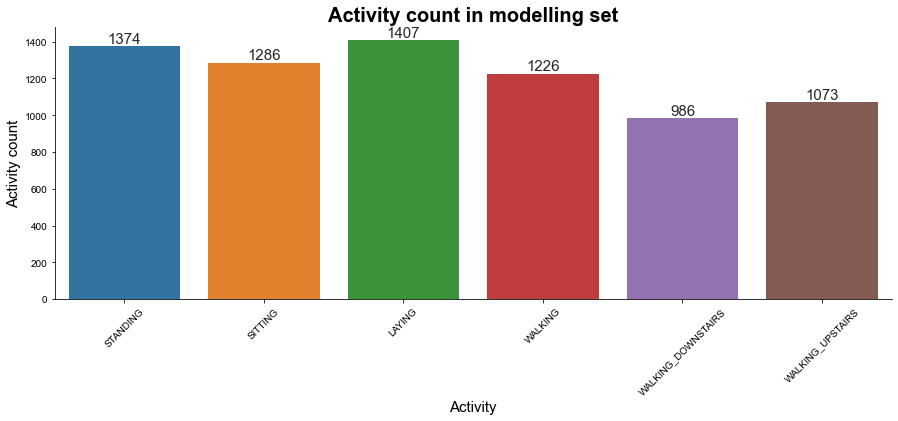

In [274]:
plt.figure(figsize = (15,5))
ax=sns.countplot(x='Activity',data=df)
plt.title("Activity count in modelling set",fontsize=20, fontweight="bold")
plt.xlabel('Activity', fontsize=15)
plt.ylabel("Activity count", fontsize=15)
sns.despine()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.set_style("ticks")
plt.xticks(rotation=45)

for container in ax.containers: 
    ax.bar_label(container,fontsize=15);

In [275]:
df_red=numerical_reduced.copy()

In [1425]:
df_red['Activity']=df['Activity']
#df_red['Activity'].unique()

In [280]:
X=df_red.drop('Activity', axis=1)

In [282]:
y=df['Activity']

### PCA

In [283]:
PCAstdscaler = StandardScaler()
PCAstdscaler.fit(X)
X_scaledPCA = PCAstdscaler.transform(X) 
filename = "transformers/PCAstdscaler.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(PCAstdscaler,file) 
                
X_scaledPCA_df = pd.DataFrame(X_scaledPCA, columns = X.columns)

#display(X_scaledPCA_df.head())

In [1423]:
pca = PCA(n_components=X_scaledPCA.shape[1])
X_r = pca.fit(X_scaledPCA_df).transform(X_scaledPCA_df)

# Percentage of variance explained for each components
print(
    "explained variance ratio (all components): %s"
    % str(pca.explained_variance_ratio_))

print(pd.Series(pca.explained_variance_ratio_).cumsum())

explained variance ratio (all components): [0.10478608 0.07845825 0.0757939  0.06836823 0.06747363 0.05928865
 0.04548045 0.04235836 0.03913626 0.03791469 0.03708288 0.03583903
 0.03515839 0.03146557 0.03053161 0.02995726 0.02782709 0.02438656
 0.02366472 0.02051283 0.01563057 0.01407207 0.01326947 0.01210255
 0.01182843 0.00891021 0.00870229]
0     0.104786
1     0.183244
2     0.259038
3     0.327406
4     0.394880
        ...   
22    0.958457
23    0.970559
24    0.982388
25    0.991298
26    1.000000
Length: 27, dtype: float64


In [1200]:
PCAcomponents=(pd.Series(pca.explained_variance_ratio_).cumsum())
PCAcomponents.to_csv('data/PCAcomponents_raw.csv', index=False)

### Manifold : TSNE Features

In [290]:
X_embedded = TSNE(n_components=3,n_jobs=5, learning_rate='auto',
                   init='random', random_state=14).fit_transform(X_scaledPCA_df)

In [291]:
X_embedded

array([[ 28.777048 , -17.803766 ,  15.093813 ],
       [  4.7884684,  13.68121  ,  15.699841 ],
       [ 11.124571 ,   0.6285975,   9.310292 ],
       ...,
       [-10.236109 ,  11.723044 , -27.964731 ],
       [-17.965414 ,   1.3848345, -24.853416 ],
       [  4.5021596, -20.159521 , -20.116144 ]], dtype=float32)

In [292]:
altX=pd.DataFrame(X_embedded, columns = ['TSNE1','TSNE2','TSNE3'])

In [293]:
altX.head()

,TSNE1,TSNE2,TSNE3
0,28.777048,-17.803766,15.093813
1,4.788468,13.681210,15.699841
2,11.124571,0.628597,9.310292
3,8.768155,3.762538,24.627064
4,7.030868,-0.530155,22.137535


In [1201]:
altX.to_csv('data/TSNE_features.csv', index=False)
altX.to_excel('data/TSNE_features.xlsx', index=False)

## Train Test Split:

In [1031]:
#27 features reduced data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

X_train = pd.DataFrame(X_train) # columns=X.columns
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

In [1213]:
#TSNE features reduced data

X_alttrain, X_alttest, y_train, y_test = train_test_split(altX, y, test_size=0.15, random_state=14)

X_alttrain = pd.DataFrame(X_alttrain) # columns=X.columns
X_alttest = pd.DataFrame(X_alttest)

X_alttrain.columns = altX.columns
X_alttest.columns = altX.columns

## MODELS and Model Peformance With Engineered Features:

In [297]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

### Random Forest Classifier:

In [298]:

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred_test))

The Accuracy for the Random Forest in the TRAIN set is 0.73
The Accuracy for the Random Forest in the TEST  set is 0.72


LAYING                358
STANDING              349
SITTING               322
WALKING               296
WALKING_UPSTAIRS      271
WALKING_DOWNSTAIRS    242
Name: Activity, dtype: int64

array([[284,  27,  39,   5,   3,   0],
       [ 46, 161, 106,   4,   4,   1],
       [ 42,  42, 252,   9,   1,   3],
       [  1,   1,   4, 239,  31,  20],
       [  1,   3,   1,  27, 193,  17],
       [  2,   0,   0,  34,  34, 201]], dtype=int64)

In [1204]:
filename = "models/RF/clf.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(clf,file) 

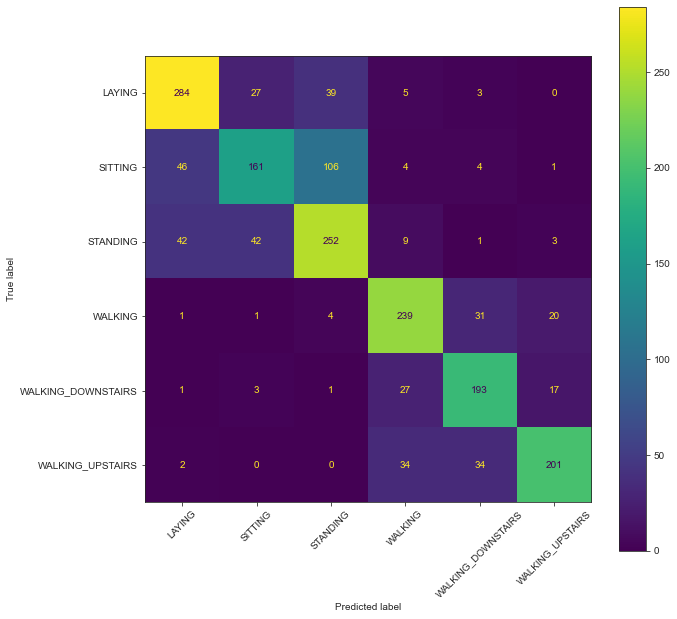

In [299]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, xticks_rotation=45)
plt.show()

In [300]:
model_performance_class(y_train, y_pred_train, y_test, y_pred_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.67
                    precision    recall  f1-score   support

            LAYING       0.71      0.70      0.71      1049
           SITTING       0.69      0.51      0.58       964
          STANDING       0.61      0.74      0.67      1025
           WALKING       0.80      0.85      0.82       930
WALKING_DOWNSTAIRS       0.77      0.84      0.80       744
  WALKING_UPSTAIRS       0.83      0.77      0.80       802

          accuracy                           0.73      5514
         macro avg       0.74      0.73      0.73      5514
      weighted avg       0.73      0.73      0.72      5514

Results obtained for the TEST SET
The Cohen's Kappa is: 0.67
                    precision    recall  f1-score   support

            LAYING       0.76      0.79      0.77       358
           SITTING       0.69      0.50      0.58       322
          STANDING       0.63      0.72      0.67       349
           WALKING       0.75    

In [302]:
kappa_scorer = make_scorer(cohen_kappa_score)

#### Random Forest Classifier Hyperparameters tuning

In [303]:
max_depth_choices= [3,5,10,15,17,20] # 
criterion_choices = ['gini','entropy'] 
min_samples_split_choices = [2,10,15,20] 
min_samples_leaf_choices = [2,10,15,20] 
max_samples_choices=[0.3,0.6,0.8,0.9]

In [304]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'max_depth': max_depth_choices,
        'max_samples':max_samples_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [305]:
model = RandomForestClassifier()

grid_search_fin = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=5,scoring=kappa_scorer) 

# Fit the grid search to the data
grid_search_fin.fit(X_train, y_train)

# and the winner is...
grid_search_fin.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [1347]:
clf_fin = RandomForestClassifier(max_depth=40,
                             min_samples_split=11,
                             min_samples_leaf =11,
                             max_samples=0.9,
                             criterion= 'entropy',    
                             random_state = 42)

clf_fin.fit(X_train, y_train)

#print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf_fin.score(X_train, y_train)))
#print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf_fin.score(X_test, y_test)))

y_pred_train_clf_fin = clf_fin.predict(X_train)
y_pred_test_clf_fin = clf_fin.predict(X_test)

display(confusion_matrix(y_test, y_pred_test_clf_fin))

array([[190,  16,   5,   5,   3,   0],
       [ 24, 113,  38,   3,   3,   2],
       [ 20,  27, 147,  10,   0,   2],
       [  0,   0,   2, 167,  18,   4],
       [  0,   0,   1,  12, 123,   5],
       [  1,   0,   1,  16,  18, 127]], dtype=int64)

In [1205]:
filename = "models/RF/clf_fin.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(clf_fin,file) 

In [1348]:
model_performance_class(y_train, y_pred_train_clf_fin, y_test, y_pred_test_clf_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1188
           1       0.89      0.80      0.84      1103
           2       0.87      0.88      0.88      1168
           3       0.91      0.97      0.94      1035
           4       0.91      0.95      0.93       845
           5       0.96      0.88      0.92       910

    accuracy                           0.90      6249
   macro avg       0.90      0.90      0.90      6249
weighted avg       0.90      0.90      0.90      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.74
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       219
           1       0.72      0.62      0.67       183
           2       0.76      0.71      0.73       206
           3       0.78      0.87      0.83       191
           4       0.75      0.87      0.80       141
         

### Random Forest with TSNE features:

In [1216]:
clf1 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf1.fit(X_alttrain, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf1.score(X_alttrain, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf1.score(X_alttest, y_test)))

yalt_pred_train = clf1.predict(X_alttrain)
yalt_pred_test = clf1.predict(X_alttest)

#display(confusion_matrix(y_test, yalt_pred_test))

The Accuracy for the Random Forest in the TRAIN set is 0.62
The Accuracy for the Random Forest in the TEST  set is 0.60


LAYING                219
STANDING              206
WALKING               191
SITTING               183
WALKING_UPSTAIRS      163
WALKING_DOWNSTAIRS    141
Name: Activity, dtype: int64

array([[164,  35,  15,   5,   0,   0],
       [ 40, 100,  41,   2,   0,   0],
       [ 36,  32, 126,   8,   3,   1],
       [  8,  10,  16,  82,  40,  35],
       [  4,   5,   1,  24,  79,  28],
       [  0,   0,   1,  25,  21, 116]], dtype=int64)

In [1208]:
filename = "models/RF/clf1.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(clf1,file) 

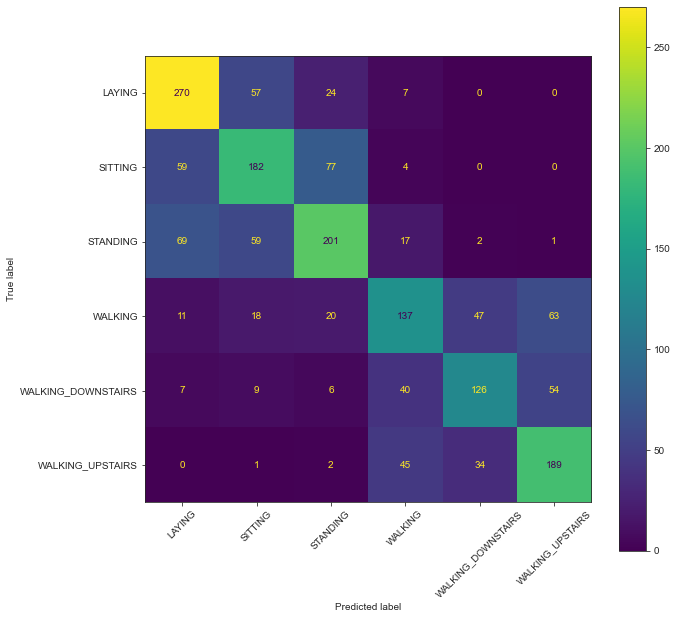

In [309]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_test = confusion_matrix(y_test,yalt_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, xticks_rotation=45)
plt.show()

In [1217]:
model_performance_class(y_train, yalt_pred_train, y_test, yalt_pred_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.54
                    precision    recall  f1-score   support

            LAYING       0.62      0.73      0.67      1188
           SITTING       0.59      0.59      0.59      1103
          STANDING       0.63      0.57      0.60      1168
           WALKING       0.66      0.53      0.59      1035
WALKING_DOWNSTAIRS       0.60      0.59      0.60       845
  WALKING_UPSTAIRS       0.62      0.70      0.66       910

          accuracy                           0.62      6249
         macro avg       0.62      0.62      0.62      6249
      weighted avg       0.62      0.62      0.62      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.52
                    precision    recall  f1-score   support

            LAYING       0.65      0.75      0.70       219
           SITTING       0.55      0.55      0.55       183
          STANDING       0.63      0.61      0.62       206
           WALKING       0.56    

#### Random Forest Classifier Hyperparameters tuning - TSNE Features

In [312]:
model = RandomForestClassifier()

grid_searchTSNE = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=5,scoring=kappa_scorer) 

# Fit the grid search to the data
grid_searchTSNE.fit(X_alttrain, y_train)

# and the winner is...
grid_searchTSNE.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

##### Random Forest TSNE model fitting and performance

In [1214]:
clfTSNE = RandomForestClassifier(max_depth=20,
                             min_samples_split=2,
                             min_samples_leaf =2,
                             max_samples=0.9,
                             criterion='entropy',
                             random_state = 42)
clfTSNE.fit(X_alttrain, y_train)


yalt_pred_train = clfTSNE.predict(X_alttrain)
yalt_pred_test = clfTSNE.predict(X_alttest)

display(confusion_matrix(y_test, yalt_pred_test))

LAYING                219
STANDING              206
WALKING               191
SITTING               183
WALKING_UPSTAIRS      163
WALKING_DOWNSTAIRS    141
Name: Activity, dtype: int64

array([[179,  22,  18,   0,   0,   0],
       [ 21, 114,  47,   1,   0,   0],
       [ 18,  30, 155,   2,   0,   1],
       [  3,   3,   8, 149,  14,  14],
       [  2,   2,   2,  23,  91,  21],
       [  0,   1,   0,  29,  11, 122]], dtype=int64)

In [1215]:
model_performance_class(y_train, yalt_pred_train, y_test, yalt_pred_test)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.94
                    precision    recall  f1-score   support

            LAYING       0.95      0.95      0.95      1188
           SITTING       0.94      0.94      0.94      1103
          STANDING       0.94      0.95      0.94      1168
           WALKING       0.95      0.95      0.95      1035
WALKING_DOWNSTAIRS       0.97      0.95      0.96       845
  WALKING_UPSTAIRS       0.96      0.95      0.96       910

          accuracy                           0.95      6249
         macro avg       0.95      0.95      0.95      6249
      weighted avg       0.95      0.95      0.95      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.68
                    precision    recall  f1-score   support

            LAYING       0.80      0.82      0.81       219
           SITTING       0.66      0.62      0.64       183
          STANDING       0.67      0.75      0.71       206
           WALKING       0.73    

In [1207]:
filename = "models/RF/clfTSNE.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(clfTSNE,file) 

### Extreme Gradient Boost

#### Special Test Split for y label encoding ( requirement for XGB)

In [897]:
encoder = LabelEncoder()
encoder.fit(df.Activity)

ylab = encoder.transform(df.Activity)

X_train, X_test, y_trainlab, y_testlab = train_test_split(X, ylab, test_size=0.15, random_state=14)

X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

#### XGB model fitting and performance

In [1430]:
xtboost = xgboost.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000,eta= 0.1, 
                        silent=1,num_classes=6, random_state=42)

xtboost.fit(X_train, y_trainlab)

y_pred_train_xgb = xtboost.predict(X_train)

y_pred_test_xgb = xtboost.predict(X_test)

display(confusion_matrix(y_testlab, y_pred_test_xgb))

# y_pred_train_xgb = clf.predict_proba(X_train)
# y_pred_test_xgb = clf.predict_proba(X_test)

[10:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([[206,  12,   1,   0,   0,   0],
       [  8, 149,  23,   1,   2,   0],
       [  2,  25, 175,   4,   0,   0],
       [  0,   1,   0, 182,   5,   3],
       [  0,   0,   1,   4, 134,   2],
       [  0,   0,   0,   6,   8, 149]], dtype=int64)

filename = "models/XGB/xtboost.pickle" 

with open(filename, "wb") as file:
        pickle.dump(xtboost,file)  

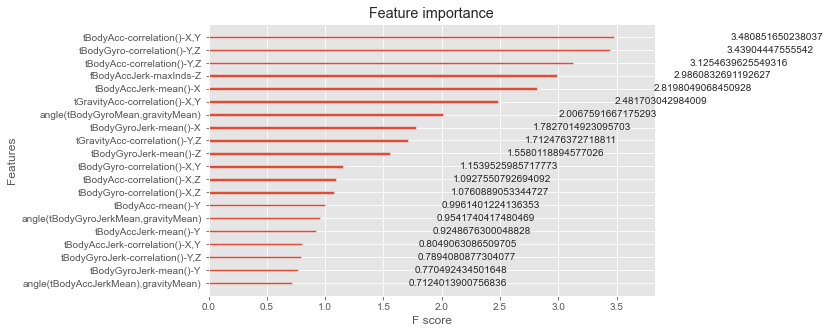

In [477]:
plt.rcParams['figure.figsize'] = (8,5)

xgb.plot_importance(xtboost,max_num_features=20,importance_type='gain')

plt.show();

In [899]:
model_performance_class(y_trainlab, y_pred_train_xgb, y_testlab, y_pred_test_xgb)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       219
           1       0.80      0.81      0.81       183
           2       0.88      0.85      0.86       206
           3       0.92      0.95      0.94       191
           4       0.90      0.95      0.92       141
         

#### Extreme Gradient Boosting  Hyperparameters tuning

In [482]:
# Create the  grid 
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150,1000), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [880]:
modelxgb = XGBClassifier()

random_search_xgb = RandomizedSearchCV(estimator = modelxgb, param_distributions=params,n_iter=25,random_state=42, cv = 6,n_jobs=5,scoring=kappa_scorer) # 3 * 2 * 2 * 2 = 3 * 8 = 24 -> 24*5

# Fit the grid search to the data
random_search_xgb.fit(X_train, y_trainlab)

# and the winner is...
random_search_xgb.best_params_

{'colsample_bytree': 0.7992694074557947,
 'gamma': 0.03177917514301182,
 'learning_rate': 0.12329469651469865,
 'max_depth': 5,
 'n_estimators': 1136,
 'subsample': 0.8918424713352255}

In [883]:
xtboost_fin = xgboost.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1136,learning_rate= 0.1232946965146986, 
                                silent=1,num_classes=6, random_state=42,subsample= 0.8918424713352255,
                               colsample_bytree= 0.7992694074557947,gamma= 0.03177917514301182)

In [900]:
xtboost_fin.fit(X_train, y_trainlab)

y_pred_train_xgb_fin = xtboost_fin.predict(X_train)

y_pred_test_xgb_fin = xtboost_fin.predict(X_test)

[17:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [901]:
model_performance_class(y_trainlab, y_pred_train_xgb_fin, y_testlab, y_pred_test_xgb_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       219
           1       0.79      0.81      0.80       183
           2       0.87      0.84      0.86       206
           3       0.93      0.94      0.93       191
           4       0.89      0.95      0.92       141
         

In [1211]:
filename = "models/XGB/xtboost_fin.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(xtboost_fin,file) 

#### Extreme Gradient Boosting with TSNE features:

##### Special Test Split for y label encoding ( requirement for XGB) -TSNE Features

In [319]:
encoder = LabelEncoder()
encoder.fit(df.Activity)

ylab = encoder.transform(df.Activity)

#TSNE features reduced data

X_alttrain, X_alttest, y_train, y_test = train_test_split(altX, ylab, test_size=0.25, random_state=14)

X_alttrain = pd.DataFrame(X_alttrain) # columns=X.columns
X_alttest = pd.DataFrame(X_alttest)

X_alttrain.columns = altX.columns
X_alttest.columns = altX.columns

##### XGB TSNE model fit and performance

In [320]:
xtboostTSNE = xgboost.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=6, random_state=42)

xtboostTSNE.fit(X_alttrain, y_train)

y_pred_train_xgbTSNE = xtboostTSNE.predict(X_alttrain)

y_pred_test_xgbTSNE = xtboostTSNE.predict(X_alttest)

display(confusion_matrix(y_test, y_pred_test_xgbTSNE))


[19:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




array([[261,  47,  44,   3,   3,   0],
       [ 51, 193,  75,   2,   0,   1],
       [ 46,  71, 224,   7,   0,   1],
       [  6,   7,   9, 203,  41,  30],
       [  5,   5,   7,  34, 149,  42],
       [  0,   0,   1,  38,  31, 201]], dtype=int64)

In [321]:
model_performance_class(y_train, y_pred_train_xgbTSNE, y_test, y_pred_test_xgbTSNE)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00       964
           2       1.00      1.00      1.00      1025
           3       1.00      1.00      1.00       930
           4       1.00      1.00      1.00       744
           5       1.00      1.00      1.00       802

    accuracy                           1.00      5514
   macro avg       1.00      1.00      1.00      5514
weighted avg       1.00      1.00      1.00      5514

Results obtained for the TEST SET
The Cohen's Kappa is: 0.60
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       358
           1       0.60      0.60      0.60       322
           2       0.62      0.64      0.63       349
           3       0.71      0.69      0.70       296
           4       0.67      0.62      0.64       242
         

In [1212]:
filename = "models/XGB/xtboostTSNE.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(xtboostTSNE,file) 

### Support Vector Machine SVM

In [1219]:

stdscaler = StandardScaler()
stdscaler.fit(X_train)

X_train_stdscaler = stdscaler.transform(X_train)
X_test_stdscaler       = stdscaler.transform(X_test)


X_train_stdscaler = pd.DataFrame(X_train_stdscaler, columns = X.columns)
X_test_stdscaler       = pd.DataFrame(X_test_stdscaler,  columns = X.columns)

# Saving Scaler:

filename = "transformers/stdscaler.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(stdscaler,file)        


svm = SVC()
svm.fit(X_train_stdscaler, y_train)

#print("Train set score: {:.2f}".format(svm.score(X_train_stdscaler, y_train)))
#print("Test set score: {:.2f}".format(svm.score(X_test_stdscaler, y_test)))

y_pred_train_svm = svm.predict(X_train_stdscaler)

y_pred_test_svm = svm.predict(X_test_stdscaler)

display(confusion_matrix(y_test, y_pred_test_svm))

Train set score: 0.89
Test set score: 0.83


array([[192,  15,  10,   0,   2,   0],
       [ 23, 133,  25,   0,   1,   1],
       [ 11,  30, 164,   1,   0,   0],
       [  2,   1,   5, 165,  15,   3],
       [  1,   2,   3,   5, 122,   8],
       [  0,   0,   0,  12,   8, 143]], dtype=int64)

In [1220]:
model_performance_class(y_train, y_pred_train_svm, y_test, y_pred_test_svm)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.87
                    precision    recall  f1-score   support

            LAYING       0.85      0.87      0.86      1188
           SITTING       0.82      0.76      0.79      1103
          STANDING       0.83      0.86      0.84      1168
           WALKING       0.97      0.97      0.97      1035
WALKING_DOWNSTAIRS       0.96      0.98      0.97       845
  WALKING_UPSTAIRS       0.97      0.94      0.95       910

          accuracy                           0.89      6249
         macro avg       0.90      0.90      0.90      6249
      weighted avg       0.89      0.89      0.89      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.80
                    precision    recall  f1-score   support

            LAYING       0.84      0.88      0.86       219
           SITTING       0.73      0.73      0.73       183
          STANDING       0.79      0.80      0.79       206
           WALKING       0.90    

In [1221]:
filename = "models/SVM/svm.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(svm,file)

#### SVM Hyperparameters tuning

In [855]:
svm_param_grid = {
    'C':[0.1,1,100,1000],
    'gamma': [1,0.1,0.01,0.001],
    'kernel':['linear','rbf','poly','sigmoid'],
    'degree':[1,2,3]  
}

In [856]:
svm_model=SVC(gamma='auto')

In [857]:
svmgrid=GridSearchCV(estimator=svm_model,param_grid=svm_param_grid,cv=5,n_jobs=5,scoring=kappa_scorer)

In [858]:
svmgrid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=5,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring=make_scorer(cohen_kappa_score))

In [859]:
# and the winner is...
svmgrid.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [1267]:
svm_fin = SVC(C= 100, degree= 1, gamma= 0.1, kernel= 'rbf')
svm_fin.fit(X_train_scaled, y_train)

print("Train set score: {:.2f}".format(svm_fin.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(svm_fin.score(X_test_scaled, y_test)))

y_pred_train_svm_fin = svm_fin.predict(X_train_stdscaler)

y_pred_test_svm_fin = svm_fin.predict(X_test_stdscaler)

display(confusion_matrix(y_test, y_pred_test_svm_fin))

Train set score: 1.00
Test set score: 0.83


array([[184,  18,   5,   0,  12,   0],
       [ 19, 130,  23,   1,   8,   2],
       [  7,  25, 170,   1,   0,   3],
       [  0,   1,   3, 167,  14,   6],
       [  2,   1,   1,   5, 121,  11],
       [  0,   0,   0,  10,   4, 149]], dtype=int64)

In [875]:
model_performance_class(y_train, y_pred_train_svm_fin, y_test, y_pred_test_svm_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1188
           SITTING       1.00      1.00      1.00      1103
          STANDING       1.00      1.00      1.00      1168
           WALKING       1.00      1.00      1.00      1035
WALKING_DOWNSTAIRS       1.00      1.00      1.00       845
  WALKING_UPSTAIRS       1.00      1.00      1.00       910

          accuracy                           1.00      6249
         macro avg       1.00      1.00      1.00      6249
      weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.80
                    precision    recall  f1-score   support

            LAYING       0.87      0.84      0.85       219
           SITTING       0.74      0.71      0.73       183
          STANDING       0.84      0.83      0.83       206
           WALKING       0.91    

In [1222]:
filename = "models/SVM/svm_fin.pickle" # Path with filename . 

with open(filename, "wb") as file: 
        pickle.dump(svm_fin,file) 

### MLP NEURAL NETWORK

In [1339]:
MLPclf_fin = MLPClassifier(solver='adam', alpha=1e-7,
                    hidden_layer_sizes=(180,),early_stopping=True,shuffle=True,random_state=42,learning_rate= 'adaptive',
                       activation='relu',max_iter=400,warm_start=True,batch_size=300)

MLPclf_fin.fit(X_train_stdscaler, y_train)

y_pred_train_mlp_fin=MLPclf_fin.predict(X_train_stdscaler)

y_pred_test_mlp_fin=MLPclf_fin.predict(X_test_stdscaler)

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1340]:
model_performance_class(y_train, y_pred_train_mlp_fin, y_test, y_pred_test_mlp_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1188
           1       0.83      0.82      0.82      1103
           2       0.88      0.87      0.87      1168
           3       0.98      0.98      0.98      1035
           4       0.96      0.98      0.97       845
           5       0.97      0.95      0.96       910

    accuracy                           0.91      6249
   macro avg       0.91      0.92      0.91      6249
weighted avg       0.91      0.91      0.91      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       219
           1       0.67      0.74      0.70       183
           2       0.83      0.76      0.79       206
           3       0.90      0.88      0.89       191
           4       0.85      0.90      0.88       141
         

In [1223]:
filename = "models/MLP/MLPclf_fin.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(MLPclf_fin,file) 

### Feed Forward Neural Networks:

In [325]:
early_stopping = EarlyStopping(patience=5) 

#### Special Train Test split for y labeling ( requirement for FF NN)

In [1232]:
y=df.Activity.copy()

ylabel = pd.get_dummies(y)
ylabel= np.argmax(ylabel.values,axis=1)

In [1233]:
X_train, X_test, y_trainlabel, y_testlabel = train_test_split(X, ylabel, test_size=0.15, random_state=14)

X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

In [1234]:
y_train_label = keras.utils.to_categorical(y_trainlabel, num_classes=6)
y_train_label
#This automatically dummify the y variable ; 5 = # of classes

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

#### NN Transformer

In [1235]:
trans = PowerTransformer()

trans.fit(X_train)

X_train_trans = trans.transform(X_train)
X_test_trans       = trans.transform(X_test)

X_train_trans = pd.DataFrame(X_train_trans, columns = X.columns)
X_test_trans       = pd.DataFrame(X_test_trans,  columns = X.columns)


filename = "transformers/trans.pickle" # Path with filename . 


with open(filename, "wb") as file: 
        pickle.dump(trans,file) 

#### Base NN model 

In [1241]:
np.random.seed(42)
model_c1 = keras.Sequential()

model_c1.add(Dense(units = 27,input_dim = X_train_trans.shape[1],activation='softmax'))

model_c1.add(Dense(units = 14,activation='softmax'))

model_c1.add(Dense(units = 6, activation='softmax')) #= number  of classes

# Compile the final network
model_c1.compile(optimizer='rmsprop', # Optimization method; better suited for classification problme
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )


model_c1.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 27)                756       
                                                                 
 dense_112 (Dense)           (None, 14)                392       
                                                                 
 dense_113 (Dense)           (None, 6)                 90        
                                                                 
Total params: 1,238
Trainable params: 1,238
Non-trainable params: 0
_________________________________________________________________


In [1242]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [1244]:
checkpoint_path = 'models/NN/cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [1245]:
history_c1 = model_c1.fit(
    X_train_trans, 
    y_train_label, 
    epochs=1000, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/1000

Epoch 1: saving model to models/NN\cls-nn1.hdf5
79/79 - 1s - loss: 1.7919 - accuracy: 0.1886 - val_loss: 1.7874 - val_accuracy: 0.1816 - 709ms/epoch - 9ms/step
Epoch 2/1000

Epoch 2: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 1.7829 - accuracy: 0.2344 - val_loss: 1.7804 - val_accuracy: 0.2392 - 171ms/epoch - 2ms/step
Epoch 3/1000

Epoch 3: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 1.7761 - accuracy: 0.2761 - val_loss: 1.7730 - val_accuracy: 0.3008 - 161ms/epoch - 2ms/step
Epoch 4/1000

Epoch 4: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 1.7688 - accuracy: 0.2903 - val_loss: 1.7648 - val_accuracy: 0.3008 - 150ms/epoch - 2ms/step
Epoch 5/1000

Epoch 5: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 1.7600 - accuracy: 0.2939 - val_loss: 1.7541 - val_accuracy: 0.3080 - 147ms/epoch - 2ms/step
Epoch 6/1000

Epoch 6: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 1.7491 - accuracy: 0.2943 - val_loss: 1.7409 - va

Epoch 48/1000

Epoch 48: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8583 - accuracy: 0.6609 - val_loss: 0.9227 - val_accuracy: 0.6360 - 122ms/epoch - 2ms/step
Epoch 49/1000

Epoch 49: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8508 - accuracy: 0.6635 - val_loss: 0.9179 - val_accuracy: 0.6432 - 125ms/epoch - 2ms/step
Epoch 50/1000

Epoch 50: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8437 - accuracy: 0.6675 - val_loss: 0.9139 - val_accuracy: 0.6480 - 136ms/epoch - 2ms/step
Epoch 51/1000

Epoch 51: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8367 - accuracy: 0.6719 - val_loss: 0.9105 - val_accuracy: 0.6488 - 128ms/epoch - 2ms/step
Epoch 52/1000

Epoch 52: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8300 - accuracy: 0.6751 - val_loss: 0.9070 - val_accuracy: 0.6520 - 119ms/epoch - 2ms/step
Epoch 53/1000

Epoch 53: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.8237 - accuracy: 0.6757 - val_loss:

Epoch 95/1000

Epoch 95: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6360 - accuracy: 0.7586 - val_loss: 0.7795 - val_accuracy: 0.7144 - 119ms/epoch - 2ms/step
Epoch 96/1000

Epoch 96: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6336 - accuracy: 0.7578 - val_loss: 0.7784 - val_accuracy: 0.7128 - 123ms/epoch - 2ms/step
Epoch 97/1000

Epoch 97: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6311 - accuracy: 0.7588 - val_loss: 0.7775 - val_accuracy: 0.7120 - 115ms/epoch - 1ms/step
Epoch 98/1000

Epoch 98: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6289 - accuracy: 0.7620 - val_loss: 0.7763 - val_accuracy: 0.7144 - 116ms/epoch - 1ms/step
Epoch 99/1000

Epoch 99: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6265 - accuracy: 0.7624 - val_loss: 0.7754 - val_accuracy: 0.7176 - 133ms/epoch - 2ms/step
Epoch 100/1000

Epoch 100: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.6244 - accuracy: 0.7614 - val_los


Epoch 141: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5653 - accuracy: 0.7874 - val_loss: 0.7569 - val_accuracy: 0.7272 - 116ms/epoch - 1ms/step
Epoch 142/1000

Epoch 142: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5641 - accuracy: 0.7882 - val_loss: 0.7567 - val_accuracy: 0.7280 - 116ms/epoch - 1ms/step
Epoch 143/1000

Epoch 143: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5630 - accuracy: 0.7888 - val_loss: 0.7566 - val_accuracy: 0.7256 - 112ms/epoch - 1ms/step
Epoch 144/1000

Epoch 144: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5621 - accuracy: 0.7892 - val_loss: 0.7556 - val_accuracy: 0.7304 - 113ms/epoch - 1ms/step
Epoch 145/1000

Epoch 145: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5610 - accuracy: 0.7894 - val_loss: 0.7554 - val_accuracy: 0.7296 - 114ms/epoch - 1ms/step
Epoch 146/1000

Epoch 146: saving model to models/NN\cls-nn1.hdf5
79/79 - 0s - loss: 0.5601 - accuracy: 0.7900 - val_loss: 0.

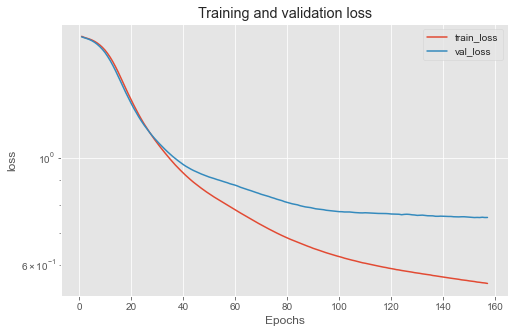

In [1246]:
plot_metric(history_c1,'loss')

In [1247]:
y_pred_train_c1 = model_c1.predict(X_train_trans) # This provides the probability for each class
y_pred_test_c1  = model_c1.predict(X_test_trans) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_trainlabel, y_pred_train_c1, y_testlabel, y_pred_test_c1)

35/35 [==============================] - 0s 824us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.74
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1188
           1       0.72      0.69      0.71      1103
           2       0.75      0.77      0.76      1168
           3       0.85      0.86      0.86      1035
           4       0.76      0.88      0.81       845
           5       0.85      0.73      0.79       910

    accuracy                           0.79      6249
   macro avg       0.79      0.79      0.79      6249
weighted avg       0.79      0.79      0.79      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.67
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       219
           1       0.59      0.64      0.61       183
           2       0.75      0.67      0.71       206
           3       0.79      0.80      0.79       191
        

####  NN Hyperparameters tuned

In [1248]:
def create_cla_nn_model(inputs,layer_list= [27,14,6],
                        activations = ['sigmoid','softmax','softmax'],
                        dropouts = [0.25,0.1,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):
    '''
    This function creates a neural network with the given amount of layers, neurons,
    activations, dropouts and regularizers.
    Inputs: 
    inputs -> input size. It must be integer
    activations -> a list of activation functions to be used in each layer
    droputs -> a list of dropouts coefficients to be used in each layer except the last one
    regularizers -> a list of regularizers to be used in the last layer. Coefficients should
    be set to zero if no regularizers are wanted.
    Output:
    neural network already compiled with: 'adam' optimizer and 'mse' as the loss.
    '''
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):    # first layer  
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):#elements of a tuple
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:#all other layers
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ): #last layer
            model.add(Dense(elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )

    model.summary()

    return model

In [1249]:
model_c2 = create_cla_nn_model(X_train_trans.shape[1])

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 27)                756       
                                                                 
 dropout_21 (Dropout)        (None, 27)                0         
                                                                 
 dense_115 (Dense)           (None, 14)                392       
                                                                 
 dense_116 (Dense)           (None, 6)                 90        
                                                                 
Total params: 1,238
Trainable params: 1,238
Non-trainable params: 0
_________________________________________________________________


In [1250]:
checkpoint_path = 'models/NN/cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [1251]:
history_c2 = model_c2.fit(
    X_train_trans, 
    y_train_label, 
    epochs=1000, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/1000

Epoch 1: saving model to models/NN\cls-nn2.hdf5
500/500 - 1s - loss: 1.7402 - accuracy: 0.2589 - val_loss: 1.6671 - val_accuracy: 0.3344 - 1s/epoch - 2ms/step
Epoch 2/1000

Epoch 2: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 1.6336 - accuracy: 0.3761 - val_loss: 1.5571 - val_accuracy: 0.4600 - 482ms/epoch - 964us/step
Epoch 3/1000

Epoch 3: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 1.5411 - accuracy: 0.4461 - val_loss: 1.4494 - val_accuracy: 0.5112 - 489ms/epoch - 978us/step
Epoch 4/1000

Epoch 4: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 1.4501 - accuracy: 0.4811 - val_loss: 1.3566 - val_accuracy: 0.5432 - 490ms/epoch - 979us/step
Epoch 5/1000

Epoch 5: saving model to models/NN\cls-nn2.hdf5
500/500 - 1s - loss: 1.3750 - accuracy: 0.5089 - val_loss: 1.2803 - val_accuracy: 0.5488 - 512ms/epoch - 1ms/step
Epoch 6/1000

Epoch 6: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 1.3112 - accuracy: 0.5193 - val_lo

Epoch 47/1000

Epoch 47: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.8617 - accuracy: 0.6935 - val_loss: 0.7899 - val_accuracy: 0.7328 - 495ms/epoch - 990us/step
Epoch 48/1000

Epoch 48: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.8609 - accuracy: 0.6913 - val_loss: 0.7838 - val_accuracy: 0.7352 - 482ms/epoch - 963us/step
Epoch 49/1000

Epoch 49: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.8497 - accuracy: 0.6925 - val_loss: 0.7818 - val_accuracy: 0.7344 - 480ms/epoch - 960us/step
Epoch 50/1000

Epoch 50: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.8533 - accuracy: 0.6879 - val_loss: 0.7786 - val_accuracy: 0.7336 - 459ms/epoch - 918us/step
Epoch 51/1000

Epoch 51: saving model to models/NN\cls-nn2.hdf5
500/500 - 1s - loss: 0.8544 - accuracy: 0.6903 - val_loss: 0.7757 - val_accuracy: 0.7392 - 525ms/epoch - 1ms/step
Epoch 52/1000

Epoch 52: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.8377 - accuracy

Epoch 93/1000

Epoch 93: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7363 - accuracy: 0.7247 - val_loss: 0.6696 - val_accuracy: 0.7568 - 481ms/epoch - 961us/step
Epoch 94/1000

Epoch 94: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7372 - accuracy: 0.7279 - val_loss: 0.6640 - val_accuracy: 0.7576 - 463ms/epoch - 925us/step
Epoch 95/1000

Epoch 95: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7343 - accuracy: 0.7273 - val_loss: 0.6644 - val_accuracy: 0.7592 - 462ms/epoch - 924us/step
Epoch 96/1000

Epoch 96: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7396 - accuracy: 0.7213 - val_loss: 0.6602 - val_accuracy: 0.7608 - 464ms/epoch - 928us/step
Epoch 97/1000

Epoch 97: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7321 - accuracy: 0.7203 - val_loss: 0.6582 - val_accuracy: 0.7632 - 457ms/epoch - 914us/step
Epoch 98/1000

Epoch 98: saving model to models/NN\cls-nn2.hdf5
500/500 - 0s - loss: 0.7209 - accura

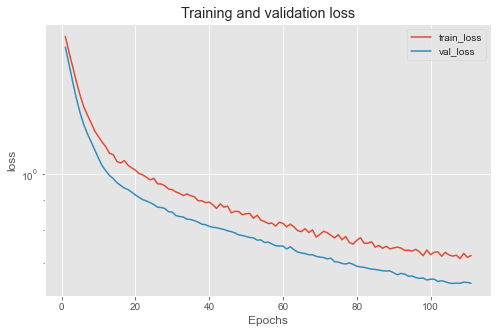

In [1252]:
plot_metric(history_c2,'loss')

In [1253]:
y_pred_train_c2 = model_c2.predict(X_train_trans) 
y_pred_test_c2  = model_c2.predict(X_test_trans) 

y_pred_train_c2 = np.argmax(y_pred_train_c2, axis=1).reshape(-1,1)
y_pred_test_c2  = np.argmax(y_pred_test_c2, axis=1).reshape(-1,1)

model_performance_class(y_trainlabel, y_pred_train_c2, y_testlabel, y_pred_test_c2)

35/35 [==============================] - 0s 912us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.74
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1188
           1       0.67      0.59      0.63      1103
           2       0.72      0.76      0.74      1168
           3       0.86      0.89      0.88      1035
           4       0.83      0.92      0.87       845
           5       0.91      0.84      0.88       910

    accuracy                           0.78      6249
   macro avg       0.79      0.79      0.79      6249
weighted avg       0.78      0.78      0.78      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.71
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       219
           1       0.68      0.56      0.61       183
           2       0.68      0.74      0.71       206
           3       0.81      0.85      0.83       191
        

### NN model with TSNE features

#### Special Train Test for FF NN ( requirement for NN)

In [1266]:
encoder = LabelEncoder()
encoder.fit(df.Activity)

ylab = encoder.transform(df.Activity)


X_alttrain, X_alttest, y_train, y_test = train_test_split(altX, ylab, test_size=0.15, random_state=14)

X_alttrain = pd.DataFrame(X_alttrain) 
X_alttest = pd.DataFrame(X_alttest)

X_alttrain.columns = altX.columns
X_alttest.columns = altX.columns

In [1255]:
TSNEtrans = PowerTransformer()
TSNEtrans.fit(X_alttrain)

X_train_transTSNE = TSNEtrans.transform(X_alttrain)
X_test_transTSNE       = TSNEtrans.transform(X_alttest)

X_train_transTSNE = pd.DataFrame(X_train_transTSNE, columns = altX.columns)
X_test_transTSNE       = pd.DataFrame(X_test_transTSNE,  columns = altX.columns)


filename = "transformers/TSNEtrans.pickle" 


with open(filename, "wb") as file:
        pickle.dump(TSNEtrans,file) 

In [1256]:
y_train_dummy = keras.utils.to_categorical(y_train, num_classes=6)
y_train_dummy

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [1257]:
def create_cla_nn_modelTSNE(inputs,layer_list= [27,14,6],
                        activations = ['sigmoid','softmax','softmax'],
                        dropouts = [0.25,0.1,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):

    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):    # first layer  
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):#elements of a tuple
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:#all other layers
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ): #last layer
            model.add(Dense(elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='rmsprop', # Optimization method
              loss='categorical_crossentropy', # Error metric to minimize
              metrics=['accuracy'] # Error metrics to report
              )

    model.summary()

    return model

In [1258]:
modelTSNE_c1 = create_cla_nn_modelTSNE(X_train_transTSNE.shape[1])

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 27)                108       
                                                                 
 dropout_22 (Dropout)        (None, 27)                0         
                                                                 
 dense_118 (Dense)           (None, 14)                392       
                                                                 
 dense_119 (Dense)           (None, 6)                 90        
                                                                 
Total params: 590
Trainable params: 590
Non-trainable params: 0
_________________________________________________________________


In [1259]:
checkpoint_path = 'models/NN/TSNEcls-nn3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [1260]:
history_TSNE_c1 = modelTSNE_c1.fit(
    X_train_transTSNE, 
    y_train_dummy, 
    epochs=1000, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/1000

Epoch 1: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 1s - loss: 1.7675 - accuracy: 0.2308 - val_loss: 1.7155 - val_accuracy: 0.2901 - 927ms/epoch - 2ms/step
Epoch 2/1000

Epoch 2: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.6534 - accuracy: 0.3351 - val_loss: 1.5404 - val_accuracy: 0.4488 - 442ms/epoch - 999us/step
Epoch 3/1000

Epoch 3: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.5044 - accuracy: 0.3809 - val_loss: 1.4142 - val_accuracy: 0.4180 - 441ms/epoch - 997us/step
Epoch 4/1000

Epoch 4: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.3985 - accuracy: 0.3997 - val_loss: 1.3204 - val_accuracy: 0.4887 - 459ms/epoch - 1ms/step
Epoch 5/1000

Epoch 5: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.3257 - accuracy: 0.4230 - val_loss: 1.2504 - val_accuracy: 0.5684 - 476ms/epoch - 1ms/step
Epoch 6/1000

Epoch 6: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.2768 - 

Epoch 46/1000

Epoch 46: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.1167 - accuracy: 0.5108 - val_loss: 1.0038 - val_accuracy: 0.5947 - 414ms/epoch - 936us/step
Epoch 47/1000

Epoch 47: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.1112 - accuracy: 0.5180 - val_loss: 1.0053 - val_accuracy: 0.5947 - 422ms/epoch - 955us/step
Epoch 48/1000

Epoch 48: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.1079 - accuracy: 0.5105 - val_loss: 1.0044 - val_accuracy: 0.5956 - 422ms/epoch - 955us/step
Epoch 49/1000

Epoch 49: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.1067 - accuracy: 0.5158 - val_loss: 1.0030 - val_accuracy: 0.5920 - 411ms/epoch - 930us/step
Epoch 50/1000

Epoch 50: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s - loss: 1.1136 - accuracy: 0.5121 - val_loss: 0.9997 - val_accuracy: 0.6011 - 417ms/epoch - 943us/step
Epoch 51/1000

Epoch 51: saving model to models/NN\TSNEcls-nn3.hdf5
442/442 - 0s

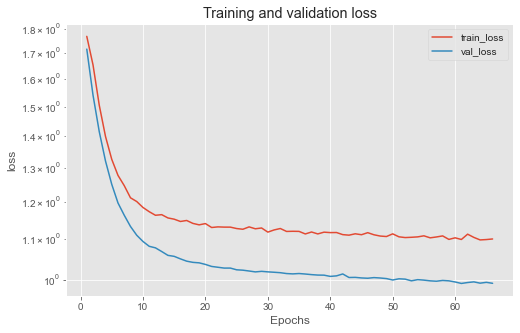

In [1261]:
plot_metric(history_TSNE_c1,'loss')

In [1262]:
y_pred_train_TSNEc1 = modelTSNE_c1.predict(X_train_transTSNE) 
y_pred_test_TSNEc1  = modelTSNE_c1.predict(X_test_transTSNE) 


y_pred_train_TSNEc1 = np.argmax(y_pred_train_TSNEc1, axis=1).reshape(-1,1)
y_pred_test_TSNEc1  = np.argmax(y_pred_test_TSNEc1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_TSNEc1, y_test, y_pred_test_TSNEc1)

58/58 [==============================] - 0s 772us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.45
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1049
           1       0.59      0.58      0.59       964
           2       0.58      0.57      0.58      1025
           3       0.55      0.44      0.49       930
           4       0.37      0.19      0.25       744
           5       0.46      0.77      0.58       802

    accuracy                           0.54      5514
   macro avg       0.53      0.53      0.52      5514
weighted avg       0.54      0.54      0.53      5514

Results obtained for the TEST SET
The Cohen's Kappa is: 0.45
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       358
           1       0.58      0.53      0.55       322
           2       0.55      0.56      0.55       349
           3       0.50      0.44      0.47       296
        

### Bagged models 

#### Bagged XGB and MLP models (soft)

In [1272]:
vc =VotingClassifier([('clf5',xtboost_fin),('clf6',MLPclf_fin)], voting='soft')
#cross_val_score(vc,X_train_stdscaler,y_train).mean

vc.fit(X_train_stdscaler, y_train)

y_pred_train_vc = vc.predict(X_train_stdscaler)
y_pred_test_vc = vc.predict(X_test_stdscaler)

#model_performance_class(y_train, y_pred_train_vc, y_test, y_pred_test_vc)

filename = "models/Bagged/vc.pickle" # Path with filename . 


with open(filename, "wb") as file: 
        pickle.dump(vc,file) 

[13:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1270]:
model_performance_class(y_train, y_pred_train_vc, y_test, y_pred_test_vc)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.87
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       219
           1       0.79      0.81      0.80       183
           2       0.86      0.84      0.85       206
           3       0.93      0.93      0.93       191
           4       0.89      0.94      0.91       141
         

#### Bagged SVM and MLP models (hard):

In [1273]:
vc1 =VotingClassifier([('clf5',svm_fin),('clf6',MLPclf_fin)], voting='hard')
#cross_val_score(vc1,X_train_stdscaler,y_train).mean

vc1.fit(X_train_stdscaler, y_train)

y_pred_train_vc1 = vc1.predict(X_train_stdscaler)
y_pred_test_vc1 = vc1.predict(X_test_stdscaler)

#display(confusion_matrix(y_test, y_pred_test_vc1))

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1274]:
model_performance_class(y_train, y_pred_train_vc1, y_test, y_pred_test_vc1)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.94
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1188
           1       0.91      0.91      0.91      1103
           2       0.99      0.87      0.93      1168
           3       0.98      1.00      0.99      1035
           4       0.97      0.99      0.98       845
           5       1.00      0.95      0.98       910

    accuracy                           0.95      6249
   macro avg       0.96      0.95      0.95      6249
weighted avg       0.95      0.95      0.95      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       219
           1       0.67      0.74      0.70       183
           2       0.88      0.70      0.78       206
           3       0.88      0.92      0.90       191
           4       0.88      0.87      0.88       141
         

#### Bagged XGB , MLP and SVM models (hard)

In [1275]:
vc2 =VotingClassifier([('clf5',xtboost_fin),('clf6',MLPclf_fin),('clf7',svm_fin)], voting='hard')

vc2.fit(X_train_stdscaler, y_train)

y_pred_train_vc2 = vc2.predict(X_train_stdscaler)
y_pred_test_vc2 = vc2.predict(X_test_stdscaler)

#display(confusion_matrix(y_test, y_pred_test_vc2))

[13:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1276]:
model_performance_class(y_train, y_pred_train_vc2, y_test, y_pred_test_vc2)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.84
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       219
           1       0.76      0.77      0.76       183
           2       0.88      0.83      0.85       206
           3       0.91      0.91      0.91       191
           4       0.88      0.91      0.90       141
         

#### Bagged Random Forest and SVM models (hard)

In [1277]:
vc3 =VotingClassifier([('clf8',clf_fin),('clf7',svm_fin)], voting='hard')

vc3.fit(X_train_stdscaler, y_train)

y_pred_train_vc3 = vc3.predict(X_train_stdscaler)
y_pred_test_vc3 = vc3.predict(X_test_stdscaler)

#display(confusion_matrix(y_test, y_pred_test_vc3))
model_performance_class(y_train, y_pred_train_vc3, y_test, y_pred_test_vc3)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.93
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1188
           1       0.94      0.92      0.93      1103
           2       1.00      0.89      0.94      1168
           3       0.93      1.00      0.96      1035
           4       0.93      0.96      0.95       845
           5       1.00      0.88      0.93       910

    accuracy                           0.94      6249
   macro avg       0.95      0.94      0.94      6249
weighted avg       0.95      0.94      0.94      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.76
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       219
           1       0.69      0.69      0.69       183
           2       0.85      0.67      0.75       206
           3       0.81      0.92      0.86       191
           4       0.80      0.85      0.82       141
         

#### Bagged XGB and RF models (soft)

In [1280]:
vc4 =VotingClassifier([('clf9',xtboost_fin),('clf10',clf_fin)], voting='soft')
#cross_val_score(vc4,X_train_stdscaler,y_train).mean

vc4.fit(X_train_stdscaler, y_train)

y_pred_train_vc4 = vc4.predict(X_train_stdscaler)
y_pred_test_vc4 = vc4.predict(X_test_stdscaler)

#display(confusion_matrix(y_test, y_pred_test_vc4))
model_performance_class(y_train, y_pred_train_vc4, y_test, y_pred_test_vc4)

filename = "models/Bagged/vc4.pickle" # Path with filename . 


with open(filename, "wb") as file: 
        pickle.dump(vc4,file) 

[14:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1

#### Bagged XGB , RF and MLP models (soft)

In [1281]:
vc5 =VotingClassifier([('clf9',xtboost_fin),('clf10',clf_fin),('clf11',MLPclf_fin)], voting='soft')
#cross_val_score(vc5,X_train_stdscaler,y_train).mean

vc5.fit(X_train_stdscaler, y_train)


y_pred_train_vc5 = vc5.predict(X_train_stdscaler)

y_pred_test_vc5 = vc5.predict(X_test_stdscaler)

#model_performance_class(y_train, y_pred_train_vc5, y_test, y_pred_test_vc5)

filename = "models/Bagged/vc5.pickle" # Path with filename . 


with open(filename, "wb") as file: 
        pickle.dump(vc5,file)  
        

[14:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1282]:
model_performance_class(y_train, y_pred_train_vc5, y_test, y_pred_test_vc5)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1188
           1       0.99      0.99      0.99      1103
           2       0.99      0.99      0.99      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           0.99      6249
   macro avg       0.99      0.99      0.99      6249
weighted avg       0.99      0.99      0.99      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.86
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       219
           1       0.78      0.79      0.79       183
           2       0.86      0.84      0.85       206
           3       0.92      0.93      0.92       191
           4       0.87      0.94      0.90       141
         

#### Bagged XGB , MLP, RF and SVM models (hard)

In [1283]:
vc6 =VotingClassifier([('clf9',xtboost_fin),('clf10',clf_fin),('clf11',MLPclf_fin),('clf12',svm_fin)], voting='hard')

vc6.fit(X_train_stdscaler, y_train)

y_pred_train_vc6 = vc6.predict(X_train_stdscaler)
y_pred_test_vc6 = vc6.predict(X_test_stdscaler)

#display(confusion_matrix(y_test, y_pred_test_vc6))


[14:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\aelarabi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [1284]:
model_performance_class(y_train, y_pred_train_vc6, y_test, y_pred_test_vc6)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.97
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1188
           1       0.97      0.95      0.96      1103
           2       1.00      0.95      0.97      1168
           3       0.99      1.00      0.99      1035
           4       0.98      1.00      0.99       845
           5       1.00      0.97      0.98       910

    accuracy                           0.98      6249
   macro avg       0.98      0.98      0.98      6249
weighted avg       0.98      0.98      0.98      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.84
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       219
           1       0.73      0.77      0.75       183
           2       0.89      0.79      0.84       206
           3       0.91      0.92      0.91       191
           4       0.86      0.94      0.89       141
         

## UNSEEN DATA 

### Import, Inspect and Prepare Unseen data

In [1470]:
test = pd.read_csv('data/test.csv')
display(test.head())
print(test.shape)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,...,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,...,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,...,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.974418,-0.999953,-0.999330,-0.998933,-0.995236,-0.978739,-0.969982,-0.749578,-0.899226,-0.553813,...,-0.285636,-0.446478,-0.756855,-0.985562,-0.985843,-0.984217,-0.988566,-0.992021,-0.985562,-0.999850,-0.984015,-0.849081,-0.936508,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,-0.560831,-0.825894,0.849179,0.670700,0.829897,-0.975283,-0.999954,-0.999467,-0.998823,-0.993498,-0.967032,-0.976257,-0.590576,-0.740206,-0.799419,...,-0.349061,-0.319763,-0.691739,-0.990498,-0.990572,-0.988406,-0.992653,-0.992505,-0.990498,-0.999925,-0.986376,-0.895847,-0.936508,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


(2947, 563)


In [1355]:
Xtest = test.drop(columns=['subject','Activity'])
Xtest = Xtest.drop(columns=columnlist, axis=1)
Xtest.shape

(2947, 27)

In [1303]:
encoder = LabelEncoder()
encoder.fit(test.Activity)
yreal = encoder.transform(test.Activity)
yunseen=test.Activity.copy()
y_real = keras.utils.to_categorical(yreal, num_classes=6)
y_real

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [1304]:
X_unseen_stdscaler=stdscaler.transform(Xtest)

X_unseen_trans = trans.transform(Xtest)

X_unseen_stdscaler = pd.DataFrame(X_unseen_stdscaler, columns = Xtest.columns)

X_unseen_trans = pd.DataFrame(X_unseen_trans, columns = Xtest.columns)

### Model Performance Testing

#### SVM 

In [1326]:
y_unseen_pred_svm_fin = svm_fin.predict(X_unseen_stdscaler)

display(confusion_matrix(yreal, y_unseen_pred_svm_fin))

array([[350, 108,  66,   3,   5,   5],
       [ 84, 294,  92,   2,  17,   2],
       [ 76,  86, 357,   6,   6,   1],
       [  5,   6,   1, 372,  80,  32],
       [  7,   2,   0,  16, 349,  46],
       [  4,   2,   2,  77, 111, 275]], dtype=int64)

In [1328]:
model_performance_class(y_test, y_pred_test_svm_fin,yreal, y_unseen_pred_svm_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       219
           1       0.74      0.71      0.73       183
           2       0.84      0.83      0.83       206
           3       0.91      0.87      0.89       191
           4       0.76      0.86      0.81       141
           5       0.87      0.91      0.89       163

    accuracy                           0.83      1103
   macro avg       0.83      0.84      0.83      1103
weighted avg       0.84      0.83      0.83      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.61
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       537
           1       0.59      0.60      0.59       491
           2       0.69      0.67      0.68       532
           3       0.78      0.75      0.77       496
           4       0.61      0.83      0.71       420
         

#### MLP

In [ ]:
MLPclf_fin.fit(X_train_stdscaler, y_train)

In [1337]:
y_unseen_pred_mlp_fin = MLPclf_fin.predict(X_unseen_stdscaler)

display(confusion_matrix(yunseen, y_unseen_pred_mlp_fin))

array([[363, 110,  47,  11,   1,   5],
       [ 74, 334,  75,   3,   2,   3],
       [ 50,  85, 387,   7,   1,   2],
       [ 19,   6,   3, 380,  47,  41],
       [ 17,  10,   3,  30, 320,  40],
       [ 17,   7,   7, 100,  51, 289]], dtype=int64)

In [1341]:
model_performance_class(y_test,y_pred_test_mlp_fin,yunseen, y_unseen_pred_mlp_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       219
           1       0.67      0.74      0.70       183
           2       0.83      0.76      0.79       206
           3       0.90      0.88      0.89       191
           4       0.85      0.90      0.88       141
           5       0.92      0.88      0.90       163

    accuracy                           0.83      1103
   macro avg       0.84      0.83      0.83      1103
weighted avg       0.83      0.83      0.83      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.64
                    precision    recall  f1-score   support

            LAYING       0.67      0.68      0.67       537
           SITTING       0.61      0.68      0.64       491
          STANDING       0.74      0.73      0.73       532
           WALKING       0.72      0.77      0.74       496
WALKING_DOWNSTAIRS       0.76    

#### Random Forest

In [1344]:
clf_fin.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, max_samples=0.9,
                       min_samples_leaf=11, min_samples_split=11,
                       random_state=42)

In [1357]:
y_unseen_pred_clf_fin = clf_fin.predict(Xtest)

display(confusion_matrix(yreal, y_unseen_pred_clf_fin ))

array([[395, 105,  21,  11,   3,   2],
       [ 96, 293,  93,   5,   0,   4],
       [ 67,  57, 389,  17,   2,   0],
       [  1,   0,   2, 382,  67,  44],
       [  2,   0,   0,  57, 305,  56],
       [  0,   0,   1, 164,  69, 237]], dtype=int64)

In [1358]:
model_performance_class(y_test, y_pred_test_clf_fin,yreal, y_unseen_pred_clf_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.74
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       219
           1       0.72      0.62      0.67       183
           2       0.76      0.71      0.73       206
           3       0.78      0.87      0.83       191
           4       0.75      0.87      0.80       141
           5       0.91      0.78      0.84       163

    accuracy                           0.79      1103
   macro avg       0.79      0.79      0.78      1103
weighted avg       0.79      0.79      0.78      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.61
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       537
           1       0.64      0.60      0.62       491
           2       0.77      0.73      0.75       532
           3       0.60      0.77      0.67       496
           4       0.68      0.73      0.70       420
         

#### FF Neural Network

In [1359]:
yunseenlabel=test.Activity.copy()
# y = pd.get_dummies(y)
# y= np.argmax(y.values,axis=1)
yunseen_label = pd.get_dummies(yunseenlabel)
yunseen_label= np.argmax(yunseen_label.values,axis=1)

In [1360]:
y_unseen_pred_nn = model_c2.predict(X_unseen_trans)
#display(confusion_matrix(yunseen, y_unseen_pred_nn))

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_unseen_pred_nn = np.argmax(y_unseen_pred_nn, axis=1).reshape(-1,1)


model_performance_class(y_testlabel, y_pred_test_c2, yunseen_label, y_unseen_pred_nn)

93/93 [==============================] - 0s 1ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.71
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       219
           1       0.68      0.56      0.61       183
           2       0.68      0.74      0.71       206
           3       0.81      0.85      0.83       191
           4       0.74      0.87      0.80       141
           5       0.88      0.78      0.83       163

    accuracy                           0.76      1103
   macro avg       0.76      0.76      0.76      1103
weighted avg       0.76      0.76      0.76      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.55
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       537
           1       0.52      0.51      0.51       491
           2       0.67      0.67      0.67       532
           3       0.62      0.73      0.67       496
          

#### Extreme Gradient Boosting :

In [1398]:
xtboost_fin.fit(X_train, y_trainlab)

[16:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7992694074557947, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.03177917514301182, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1232946965146986, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1136, n_jobs=0, num_classes=6, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42, ...)

In [1399]:
y_unseen_pred_xgb_fin = xtboost_fin.predict(Xtest)
#display(confusion_matrix(yreal, y_unseen_pred_xgb_fin))
model_performance_class(y_testlab, y_pred_test_xgb_fin,yreal, y_unseen_pred_xgb_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.88
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       219
           1       0.79      0.81      0.80       183
           2       0.87      0.84      0.86       206
           3       0.93      0.94      0.93       191
           4       0.89      0.95      0.92       141
           5       0.95      0.90      0.93       163

    accuracy                           0.90      1103
   macro avg       0.90      0.90      0.90      1103
weighted avg       0.90      0.90      0.90      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.73
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       537
           1       0.73      0.73      0.73       491
           2       0.81      0.85      0.83       532
           3       0.71      0.82      0.76       496
           4       0.76      0.84      0.79       420
         

### Bagged Models:

#### Bagged models XGB/MLP - Soft

In [1369]:
y_unseen_pred_vc = vc.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc,yreal, y_unseen_pred_vc )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.87
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       219
           1       0.79      0.81      0.80       183
           2       0.86      0.84      0.85       206
           3       0.93      0.93      0.93       191
           4       0.89      0.94      0.91       141
           5       0.95      0.91      0.93       163

    accuracy                           0.89      1103
   macro avg       0.89      0.89      0.89      1103
weighted avg       0.89      0.89      0.89      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.72
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       537
           1       0.71      0.73      0.72       491
           2       0.80      0.83      0.82       532
           3       0.74      0.80      0.77       496
           4       0.77      0.83      0.80       420
         

#### Bagged models SVM/MLP - Hard

In [1373]:
y_unseen_pred_vc1 = vc1.predict(X_unseen_stdscaler)

#display(confusion_matrix(yreal, y_unseen_pred_vc1))
model_performance_class(y_test, y_pred_test_vc1,yreal, y_unseen_pred_vc1 )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.80
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       219
           1       0.67      0.74      0.70       183
           2       0.88      0.70      0.78       206
           3       0.88      0.92      0.90       191
           4       0.88      0.87      0.88       141
           5       0.95      0.87      0.91       163

    accuracy                           0.83      1103
   macro avg       0.85      0.84      0.84      1103
weighted avg       0.84      0.83      0.84      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.62
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       537
           1       0.59      0.66      0.62       491
           2       0.75      0.62      0.68       532
           3       0.70      0.79      0.74       496
           4       0.71      0.78      0.74       420
         

#### Bagged models XGB/MLP/SVM - Hard

In [1374]:
y_unseen_pred_vc2 = vc2.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc2,yreal, y_unseen_pred_vc2)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.84
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       219
           1       0.76      0.77      0.76       183
           2       0.88      0.83      0.85       206
           3       0.91      0.91      0.91       191
           4       0.88      0.91      0.90       141
           5       0.94      0.90      0.92       163

    accuracy                           0.87      1103
   macro avg       0.87      0.87      0.87      1103
weighted avg       0.87      0.87      0.87      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.68
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       537
           1       0.65      0.66      0.65       491
           2       0.77      0.77      0.77       532
           3       0.74      0.80      0.77       496
           4       0.76      0.84      0.80       420
         

#### Bagged models RF/SVM - Hard

In [1375]:
y_unseen_pred_vc3 = vc3.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc3,yreal, y_unseen_pred_vc3)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.76
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       219
           1       0.69      0.69      0.69       183
           2       0.85      0.67      0.75       206
           3       0.81      0.92      0.86       191
           4       0.80      0.85      0.82       141
           5       0.96      0.76      0.85       163

    accuracy                           0.80      1103
   macro avg       0.81      0.80      0.80      1103
weighted avg       0.81      0.80      0.80      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.61
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       537
           1       0.62      0.63      0.62       491
           2       0.81      0.59      0.69       532
           3       0.62      0.84      0.71       496
           4       0.69      0.79      0.74       420
         

#### Bagged models RF/XGB - Soft

In [1376]:
y_unseen_pred_vc4 = vc4.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc4,yreal, y_unseen_pred_vc4)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.86
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       219
           1       0.80      0.78      0.79       183
           2       0.85      0.85      0.85       206
           3       0.91      0.93      0.92       191
           4       0.88      0.94      0.91       141
           5       0.94      0.88      0.91       163

    accuracy                           0.88      1103
   macro avg       0.88      0.89      0.88      1103
weighted avg       0.88      0.88      0.88      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.72
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       537
           1       0.72      0.72      0.72       491
           2       0.80      0.84      0.82       532
           3       0.70      0.81      0.75       496
           4       0.75      0.83      0.79       420
         

#### Bagged models RF/XGB/MLP - Soft

In [1377]:
y_unseen_pred_vc5 = vc5.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc5,yreal, y_unseen_pred_vc5)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.86
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       219
           1       0.78      0.79      0.79       183
           2       0.86      0.84      0.85       206
           3       0.92      0.93      0.92       191
           4       0.87      0.94      0.90       141
           5       0.95      0.90      0.92       163

    accuracy                           0.89      1103
   macro avg       0.89      0.89      0.89      1103
weighted avg       0.89      0.89      0.89      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.72
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       537
           1       0.71      0.73      0.72       491
           2       0.80      0.82      0.81       532
           3       0.71      0.82      0.76       496
           4       0.77      0.81      0.79       420
         

#### Bagged models RF/XGB/MLP/SVM - Hard

In [1378]:
y_unseen_pred_vc6 = vc6.predict(X_unseen_stdscaler)

model_performance_class(y_test, y_pred_test_vc6,yreal, y_unseen_pred_vc6)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.84
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       219
           1       0.73      0.77      0.75       183
           2       0.89      0.79      0.84       206
           3       0.91      0.92      0.91       191
           4       0.86      0.94      0.89       141
           5       0.97      0.88      0.92       163

    accuracy                           0.87      1103
   macro avg       0.87      0.87      0.87      1103
weighted avg       0.87      0.87      0.87      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.68
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       537
           1       0.66      0.67      0.67       491
           2       0.81      0.75      0.78       532
           3       0.69      0.82      0.75       496
           4       0.74      0.82      0.78       420
         

#### Summary of Models Performance:

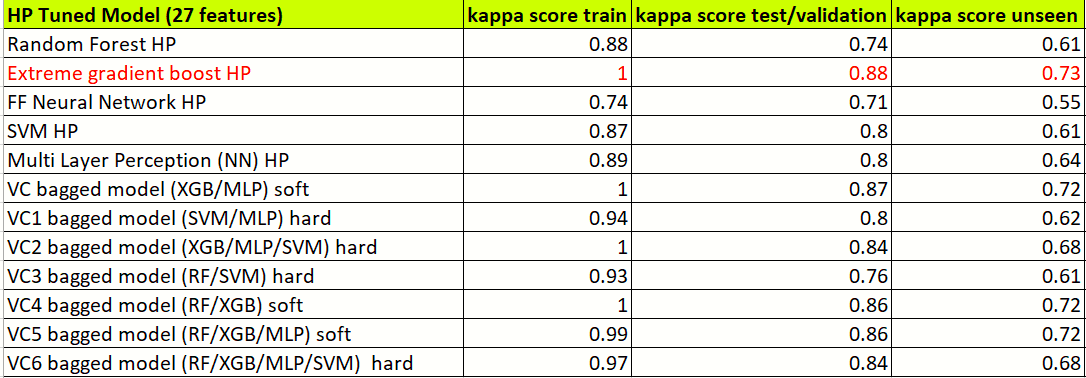

##### Bagged models outperformed signal models with the exception of XGB
Based on performance, the Extreme Gradient Boost tuned for HP is adopted and used for feature tuning and sensitivity analysis

## Feature Engineering Sensitivity Analysis with XGB model - Fine Tuning

### Check XGB peformance with all features(all 561) 

#### ALl features Train Test Split

In [1382]:
encoder = LabelEncoder()
encoder.fit(df.Activity)

ylab = encoder.transform(df.Activity)
Xall=df.drop(columns=['subject','Activity'])


X_trainall, X_testall, y_trainlaball, y_testlaball = train_test_split(Xall, ylab, test_size=0.15, random_state=14)

X_trainall = pd.DataFrame(X_trainall) # columns=X.columns
X_testall = pd.DataFrame(X_testall)

X_trainall.columns = Xall.columns
X_testall.columns = Xall.columns

In [1383]:
xtboost_fin.fit(X_trainall, y_trainlaball)

y_pred_trainall_xgb_fin = xtboost_fin.predict(X_trainall)


y_pred_testall_xgb_fin = xtboost_fin.predict(X_testall)

[15:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [1384]:
model_performance_class(y_trainlaball, y_pred_trainall_xgb_fin, y_testlaball, y_pred_testall_xgb_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       0.98      0.99      0.99       183
           2       1.00      0.98      0.99       206
           3       1.00      0.99      0.99       191
           4       0.99      1.00      0.99       141
         

In [1385]:
Xunseen_all=test.drop(columns=['subject','Activity'])

In [1386]:
y_unseenall_pred_xgb_fin = xtboost_fin.predict(Xunseen_all)

#display(confusion_matrix(yreal, y_unseen_pred_xgb_fin))

model_performance_class(y_testlaball, y_pred_testall_xgb_fin,yreal, y_unseenall_pred_xgb_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       0.98      0.99      0.99       183
           2       1.00      0.98      0.99       206
           3       1.00      0.99      0.99       191
           4       0.99      1.00      0.99       141
           5       1.00      1.00      1.00       163

    accuracy                           0.99      1103
   macro avg       0.99      0.99      0.99      1103
weighted avg       0.99      0.99      0.99      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.93
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.86      0.90       491
           2       0.89      0.95      0.91       532
           3       0.94      0.97      0.95       496
           4       0.98      0.91      0.94       420
         

##### Model performance boosted by 27.4 % from kappa of 0.73 to kappa of 0.93

### Features Sensitivity Analysis:

In [1388]:
# vif_data = pd.read_csv('vif.csv') # called earlier

In [1389]:
noncorrelated_columns1=vif_data[vif_data.VIF < 44] # keep features with VIF<5

correlated_columns1=vif_data[vif_data.VIF > 44] # drop features with with VIF > 5

In [1390]:
columnlist1=list(correlated_columns1['feature'])

In [1391]:
Xmid = numerical.drop(columns=columnlist1, axis=1)
print(Xmid.shape)
Xmid.head()

(7352, 70)


,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-sma(),tGravityAcc-entropy()-X,tGravityAcc-entropy()-Z,"tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,"tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,...,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAccJerk-maxInds-X,fBodyAccJerk-maxInds-Y,fBodyAccJerk-maxInds-Z,fBodyAccJerk-meanFreq()-X,fBodyAccJerk-meanFreq()-Y,fBodyAccJerk-meanFreq()-Z,fBodyGyro-maxInds-X,fBodyGyro-maxInds-Y,fBodyGyro-maxInds-Z,fBodyGyro-meanFreq()-X,fBodyGyro-meanFreq()-Y,fBodyGyro-meanFreq()-Z,fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,-0.020294,-0.132905,-0.407747,-0.679338,-0.602122,0.376314,0.435129,0.660790,-0.375426,-1.0,0.113806,0.570222,0.439027,0.986913,0.077996,0.005001,-0.067831,0.387644,-0.477875,-0.385300,0.033644,-0.126511,-0.006101,-0.031365,0.107725,...,0.131836,-0.052050,1.00,-0.24,-1.00,0.870385,0.210697,0.263708,-1.0,-1.000000,-1.000000,-0.257549,0.097947,0.547151,-0.793103,-0.088436,-0.988175,-0.936508,0.346989,-0.128989,-0.074323,-0.112754,0.030400,-0.464761,-0.018446
1,-0.016411,-0.123520,-0.714892,-0.500930,-0.570979,-0.013429,-0.072692,0.579382,-0.383430,-1.0,-0.210494,-0.831284,-0.865711,0.974386,0.074007,0.005771,0.029377,0.527303,0.166573,-0.208772,0.084104,-0.268554,-0.016112,-0.083894,0.100584,...,0.042864,-0.014310,-0.32,-0.12,-0.32,0.608514,-0.053676,0.063148,-1.0,-1.000000,-1.000000,-0.048167,-0.401608,-0.068178,-1.000000,-0.044150,-0.989549,-0.841270,0.532061,-0.271958,0.158075,0.053477,-0.007435,-0.732626,0.703511
2,-0.019467,-0.113462,-0.592235,-0.485821,-0.570979,-0.124698,-0.181105,0.608900,-0.401602,-1.0,-0.926776,-0.181090,0.337936,0.643417,0.073636,0.003104,-0.009046,0.371718,0.246800,-0.120105,-0.110026,-0.039953,-0.031698,-0.102335,0.096127,...,-0.064611,0.082677,-0.16,-0.48,-0.28,0.115434,-0.193436,0.038254,-1.0,-0.870968,-1.000000,-0.216685,-0.017264,-0.110720,-0.862069,0.257899,-0.999890,-0.904762,0.660795,-0.212728,0.414503,-0.118559,0.177899,0.100699,0.808529
3,-0.026201,-0.123283,-0.627446,-0.850930,-0.911872,-0.305693,-0.362654,0.507459,-0.400278,-1.0,-0.596101,-0.991309,-0.968821,0.984256,0.077321,0.020058,-0.009865,0.193414,0.451870,-0.127495,-0.083278,0.457060,-0.043410,-0.091386,0.085538,...,0.080302,0.185695,-0.12,-0.56,-0.28,0.035798,-0.093036,0.168095,-1.0,-1.000000,-0.793103,0.216862,-0.135245,-0.049728,-1.000000,0.073581,-0.995562,1.000000,0.678921,-0.035684,0.404573,-0.036788,-0.012892,0.640011,-0.485366
4,-0.016570,-0.115362,-0.786553,-0.559477,-0.761434,-0.155804,-0.189763,0.599213,-0.400477,-1.0,-0.616578,-0.408330,-0.184840,0.964797,0.073444,0.019122,0.016780,0.287185,0.180189,-0.272884,0.103065,0.064729,-0.033960,-0.074708,0.077392,...,0.057988,0.559786,-0.32,-0.08,0.04,0.273350,0.079135,0.292384,-1.0,-0.806452,-1.000000,-0.153343,-0.088403,-0.162230,-1.000000,0.394310,-0.982177,-1.000000,0.559058,-0.273582,0.087753,0.123320,0.122542,0.693578,-0.615971


#### Train Test Split for fined tuned feature selection

In [1392]:
encoder = LabelEncoder()
encoder.fit(df.Activity)

ylab = encoder.transform(df.Activity)


Xmid_train, Xmid_test, y_trainlabmid, y_testlabmid = train_test_split(Xmid, ylab, test_size=0.15, random_state=14)

Xmid_train = pd.DataFrame(Xmid_train) # columns=X.columns
Xmid_test = pd.DataFrame(Xmid_test)

Xmid_train.columns = Xmid.columns
Xmid_test.columns = Xmid.columns

In [1401]:
xtboost_fin.fit(Xmid_train, y_trainlabmid)

y_pred_trainmid_xgb_fin = xtboost_fin.predict(Xmid_train)

y_pred_testmid_xgb_fin = xtboost_fin.predict(Xmid_test)

[16:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_classes", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




#### XGB Model performance with fined tuned teature engineering

In [1402]:
model_performance_class(y_trainlabmid, y_pred_trainmid_xgb_fin, y_testlabmid, y_pred_testmid_xgb_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00      1103
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00      1035
           4       1.00      1.00      1.00       845
           5       1.00      1.00      1.00       910

    accuracy                           1.00      6249
   macro avg       1.00      1.00      1.00      6249
weighted avg       1.00      1.00      1.00      6249

Results obtained for the TEST SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       219
           1       0.91      0.87      0.89       183
           2       0.91      0.96      0.93       206
           3       1.00      0.98      0.99       191
           4       0.96      1.00      0.98       141
         

##### Applying the chosen features to the unseen data:

In [1395]:
Xtest1 = test.drop(columns=['subject','Activity'])
Xtest1 = Xtest1.drop(columns=columnlist1, axis=1)
Xtest1.shape

(2947, 70)

In [1403]:
y_unseenmid_pred_xgb_fin = xtboost_fin.predict(Xtest1)

#display(confusion_matrix(yreal, y_unseen_pred_xgb_fin))

model_performance_class(y_testlabmid, y_pred_testmid_xgb_fin,yreal, y_unseenmid_pred_xgb_fin )

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       219
           1       0.91      0.87      0.89       183
           2       0.91      0.96      0.93       206
           3       1.00      0.98      0.99       191
           4       0.96      1.00      0.98       141
           5       1.00      0.98      0.99       163

    accuracy                           0.96      1103
   macro avg       0.96      0.96      0.96      1103
weighted avg       0.96      0.96      0.96      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.90
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       537
           1       0.85      0.87      0.86       491
           2       0.88      0.94      0.91       532
           3       0.93      0.98      0.95       496
           4       0.93      0.95      0.94       420
         

## Final Model and Features Selection:

Chosen model : XGB HP with 70 features

23.3 % XGB model performance improvement with 90 % Kappa Score on unseen data

Confusion Matrix display for 27 featrues:

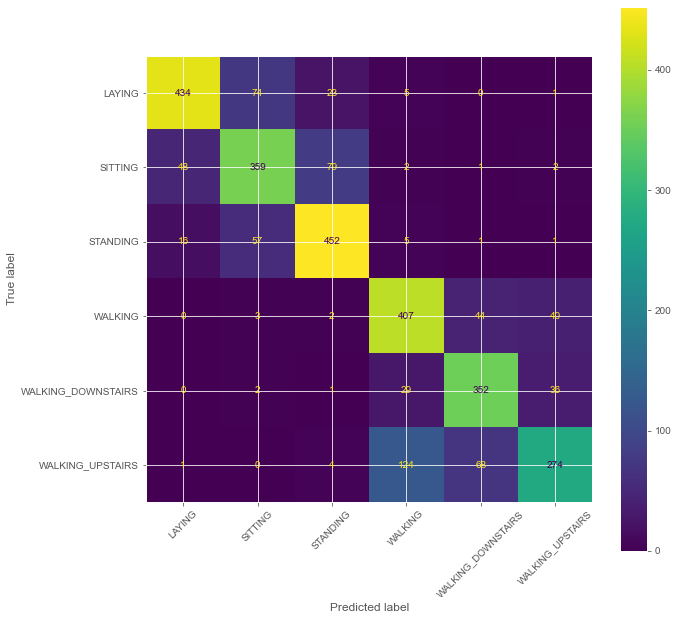

In [1400]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_test = confusion_matrix(yreal, y_unseen_pred_xgb_fin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, xticks_rotation=45)
plt.show()

Confusion Matrix display for 70 featrues:

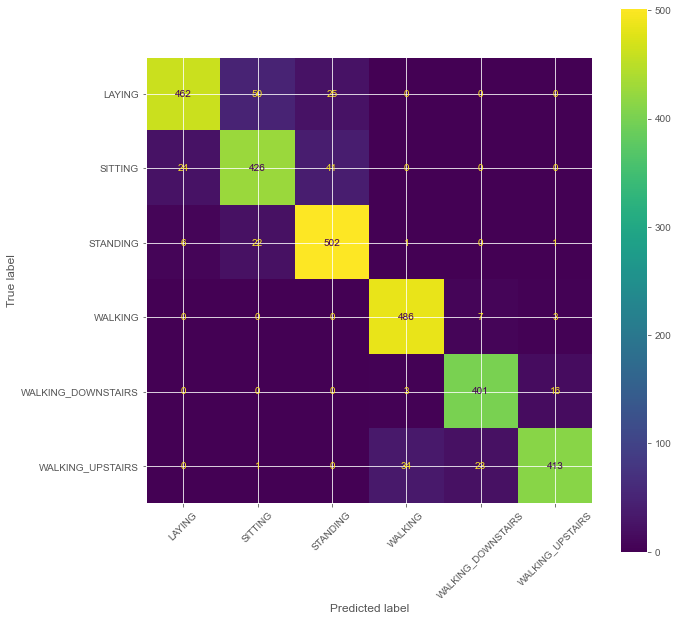

In [1404]:
fig, ax = plt.subplots(figsize=(10, 10))
cm_test = confusion_matrix(yreal, y_unseenmid_pred_xgb_fin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, xticks_rotation=45)
plt.show()

The 70 most important features:

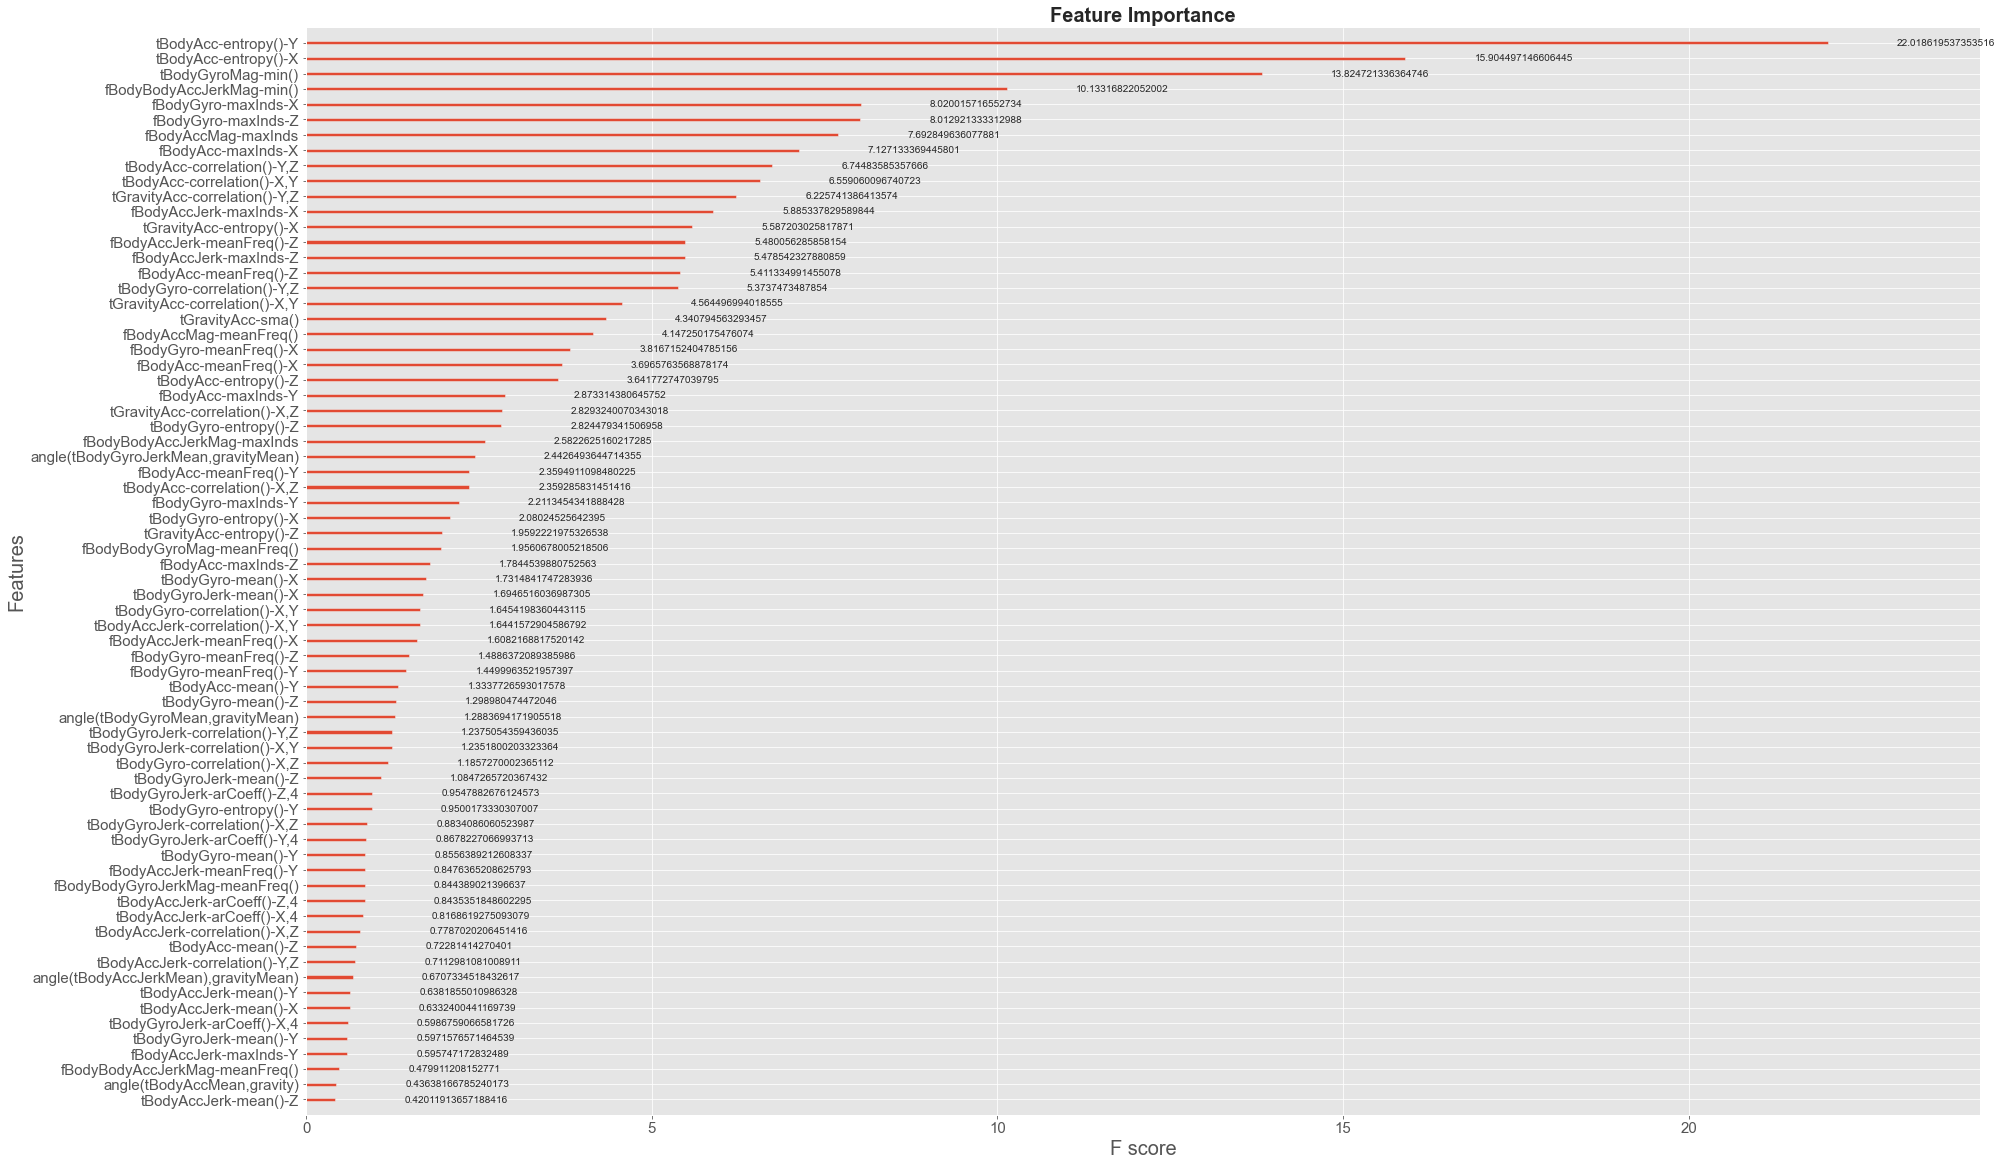

In [1420]:
plt.rcParams['figure.figsize'] = (30,20)

xgb.plot_importance(xtboost_fin,max_num_features=70,importance_type='gain')
plt.title('Feature Importance',fontsize=20, fontweight="bold")
plt.xlabel('F score',fontsize=20)
plt.ylabel('Features',fontsize=20)
sns.despine()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show();

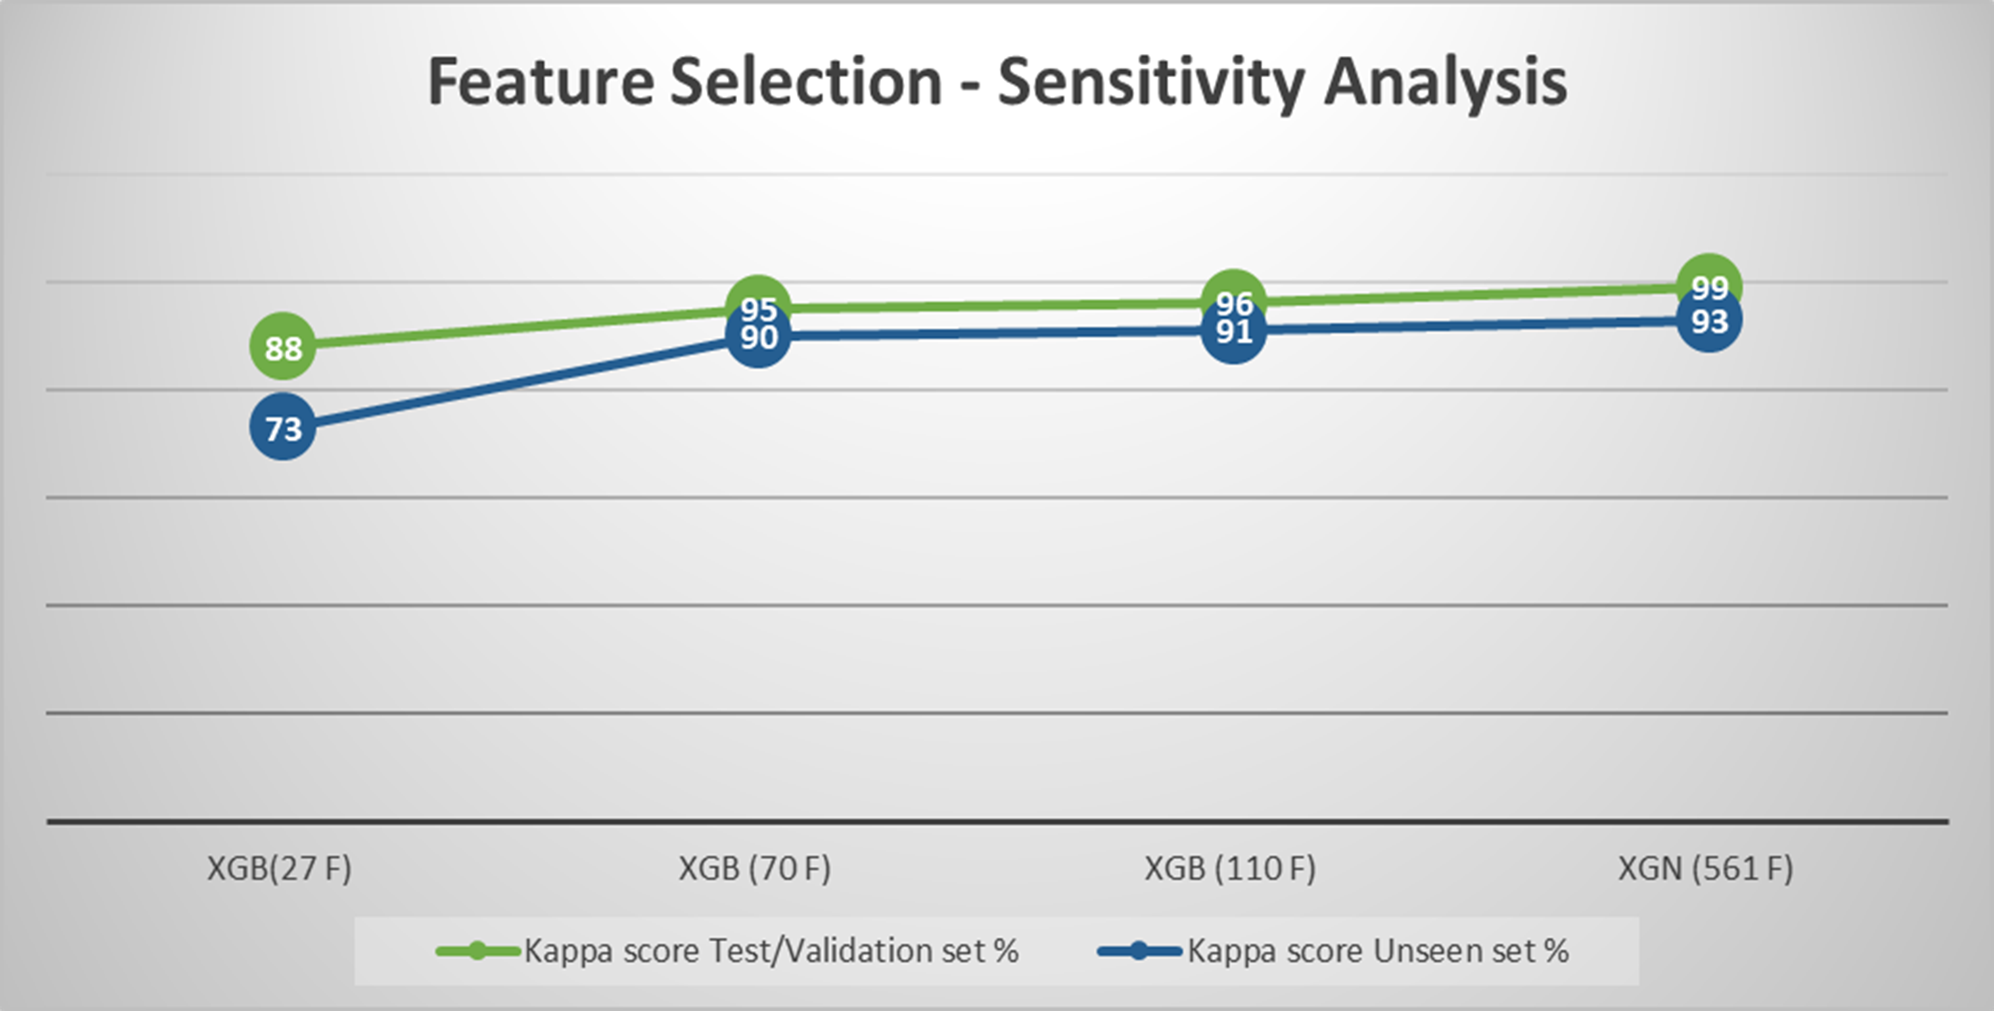

THE END

In [1289]:
import lib.functions

lib.functions.model_performance_class(y_testlabmid, y_pred_testmid_xgb_fin,yreal, y_unseenmid_pred_xgb_fin)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       219
           1       0.91      0.87      0.89       183
           2       0.91      0.96      0.93       206
           3       1.00      0.98      0.99       191
           4       0.96      1.00      0.98       141
           5       1.00      0.98      0.99       163

    accuracy                           0.96      1103
   macro avg       0.96      0.96      0.96      1103
weighted avg       0.96      0.96      0.96      1103

Results obtained for the TEST SET
The Cohen's Kappa is: 0.90
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       537
           1       0.85      0.87      0.86       491
           2       0.88      0.94      0.91       532
           3       0.93      0.98      0.95       496
           4       0.93      0.95      0.94       420
         